In [1]:
from scipy.special import roots_legendre
from scipy.linalg import solve
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym


In [19]:
u = 1
k = 0.01
L = 1
Pe = u/k*L

X = np.linspace(0,L,100)

f = (1-np.exp(Pe*X/L))/(1-np.exp(Pe))

In [20]:
Pe

100.0

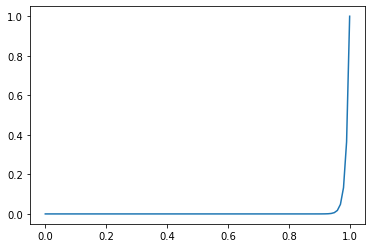

In [21]:
plt.plot(X,f)
plt.show()

In [24]:
x,a,b,c,d = sym.symbols('x,a,b,c,d')

p3a = ((x-b)*(x-c)*(x-d)/(a-b)/(a-c)/(a-d)).subs(a,-1).subs(b,-1/3).subs(c,1/3).subs(d,1)
p3b = ((x-a)*(x-c)*(x-d)/(b-a)/(b-c)/(b-d)).subs(a,-1).subs(b,-1/3).subs(c,1/3).subs(d,1)
p3c = ((x-a)*(x-b)*(x-d)/(c-a)/(c-b)/(c-d)).subs(a,-1).subs(b,-1/3).subs(c,1/3).subs(d,1)
p3d = ((x-a)*(x-b)*(x-c)/(d-a)/(d-b)/(d-c)).subs(a,-1).subs(b,-1/3).subs(c,1/3).subs(d,1)

p2a = ((x-b)*(x-c)/(a-b)/(a-c)).subs(a,-1).subs(b,0).subs(c,1)
p2b = ((x-a)*(x-c)/(b-a)/(b-c)).subs(a,-1).subs(b,0).subs(c,1)
p2c = ((x-b)*(x-a)/(c-a)/(c-b)).subs(a,-1).subs(b,0).subs(c,1)

p1a = ((x-b)/(a-b)).subs(a,-1).subs(b,1)
p1b = ((x-a)/(b-a)).subs(a,-1).subs(b,1)

dp2a = sym.diff(p2a,x)
dp2b = sym.diff(p2b,x)
dp2c = sym.diff(p2c,x)

dp1a = sym.diff(p1a,x)
dp1b = sym.diff(p1b,x)


In [26]:
b1 = sym.integrate(p1a*dp1a,(x,-1,1))
b2 = sym.integrate(p1a*dp1b,(x,-1,1))
b3 = sym.integrate(p1b*dp1a,(x,-1,1))
b4 = sym.integrate(p1b*dp1b,(x,-1,1))
(b1,b2,b3,b4)

(-1/2, 1/2, -1/2, 1/2)

In [218]:
f1 = sym.integrate(p3a,(x,-1,1))
f2 = sym.integrate(p3b,(x,-1,1))
f3 = sym.integrate(p3c,(x,-1,1))
f4 = sym.integrate(p3d,(x,-1,1))
(f1,f2,f3,f4)

(0.250000000000000, 0.750000000000000, 0.750000000000000, 0.250000000000000)

In [206]:
8/9

0.8888888888888888

In [59]:
a1 = sym.integrate(dp1a*dp1a,(x,-1,1))
a2 = sym.integrate(dp1a*dp1b,(x,-1,1))
a3 = sym.integrate(dp1b*dp1a,(x,-1,1))
a4 = sym.integrate(dp1b*dp1b,(x,-1,1))
sym.Matrix([[a1,a2],[a3,a4]])

Matrix([
[ 1/2, -1/2],
[-1/2,  1/2]])

In [65]:
a1 = sym.integrate(dp2a*dp2a,(x,-1,1))
a2 = sym.integrate(dp2a*dp2b,(x,-1,1))
a3 = sym.integrate(dp2a*dp2c,(x,-1,1))
a4 = sym.integrate(dp2b*dp2a,(x,-1,1))
a5 = sym.integrate(dp2b*dp2b,(x,-1,1))
a6 = sym.integrate(dp2b*dp2c,(x,-1,1))
a7 = sym.integrate(dp2c*dp2a,(x,-1,1))
a8 = sym.integrate(dp2c*dp2b,(x,-1,1))
a9 = sym.integrate(dp2c*dp2c,(x,-1,1))

Ae = np.array([[a1,a2,a3],[a4,a5,a6],[a7,a8,a9]],dtype=float)

In [68]:
a1 = sym.integrate(p2a*p2a,(x,-1,1))
a2 = sym.integrate(p2a*p2b,(x,-1,1))
a3 = sym.integrate(p2a*p2c,(x,-1,1))
a4 = sym.integrate(p2b*p2a,(x,-1,1))
a5 = sym.integrate(p2b*p2b,(x,-1,1))
a6 = sym.integrate(p2b*p2c,(x,-1,1))
a7 = sym.integrate(p2c*p2a,(x,-1,1))
a8 = sym.integrate(p2c*p2b,(x,-1,1))
a9 = sym.integrate(p2c*p2c,(x,-1,1))

Ce = np.array([[a1,a2,a3],[a4,a5,a6],[a7,a8,a9]],dtype=float);Ce

array([[ 0.26666667,  0.13333333, -0.06666667],
       [ 0.13333333,  1.06666667,  0.13333333],
       [-0.06666667,  0.13333333,  0.26666667]])

In [3]:
f1 = sym.integrate(p2a,(x,-1,1))
f2 = sym.integrate(p2b,(x,-1,1))
f3 = sym.integrate(p2c,(x,-1,1))
(f1,f2,f3)


(1/3, 4/3, 1/3)

In [4]:
x,w = roots_legendre(2)

In [5]:
f = lambda x: 0.5+x/2

np.sum(w*f(x))

1.0

In [165]:
N=5
E = np.arange(N-1)

LM = np.array([],dtype=int)
index_p = 0
for e in E:
    LM = np.append(LM,[index_p,index_p+1])
    index_p += 1
LM = LM.reshape(N-1,2)

In [166]:
LM

array([[0, 1],
       [1, 2],
       [2, 3],
       [3, 4]])

In [167]:
Ae = np.array([[1,-1],[-1,1]])/2
Ce = np.array([[2,1],[1,2]])/3
Fe = np.array([1,1])

In [168]:
X = np.linspace(0,1,N)
he = X[1]-X[0]

n= 1

alpha = 1
gamma = 0


sizeF = (N-1)*(n+1) - (N-2)

K = np.zeros((sizeF,sizeF))
for e, global_p in enumerate(LM):
    local_p = global_p - n*e

    K[global_p[0],global_p[0]] += 2/he*Ae[local_p[0],local_p[0]]*alpha + he/2*Ce[local_p[0],local_p[0]]*gamma
    K[global_p[0],global_p[1]] += 2/he*Ae[local_p[0],local_p[1]]*alpha + he/2*Ce[local_p[0],local_p[1]]*gamma
    #K[global_p[0],global_p[2]] += 2/he*Ae[local_p[0],local_p[2]]*alpha + he/2*Ce[local_p[0],local_p[2]]*gamma
    K[global_p[1],global_p[0]] += 2/he*Ae[local_p[1],local_p[0]]*alpha + he/2*Ce[local_p[1],local_p[0]]*gamma
    K[global_p[1],global_p[1]] += 2/he*Ae[local_p[1],local_p[1]]*alpha + he/2*Ce[local_p[1],local_p[1]]*gamma
    #K[global_p[1],global_p[2]] += 2/he*Ae[local_p[1],local_p[2]]*alpha + he/2*Ce[local_p[1],local_p[2]]*gamma
    #K[global_p[2],global_p[0]] += 2/he*Ae[local_p[2],local_p[0]]*alpha + he/2*Ce[local_p[1],local_p[0]]*gamma
    #K[global_p[2],global_p[1]] += 2/he*Ae[local_p[2],local_p[1]]*alpha + he/2*Ce[local_p[1],local_p[1]]*gamma
    #K[global_p[2],global_p[2]] += 2/he*Ae[local_p[2],local_p[2]]*alpha + he/2*Ce[local_p[1],local_p[2]]*gamma


K[0,0] += 2/he*Ae[-1,-1]*alpha + he/2*Ce[-1,-1]*gamma
K[-1,-1] += 2/he*Ae[0,0]*alpha + he/2*Ce[0,0]*gamma

In [169]:
K

array([[ 8., -4.,  0.,  0.,  0.],
       [-4.,  8., -4.,  0.,  0.],
       [ 0., -4.,  8., -4.,  0.],
       [ 0.,  0., -4.,  8., -4.],
       [ 0.,  0.,  0., -4.,  8.]])

In [170]:
X = np.linspace(0,1,N)
he = X[1]-X[0]
n=1

sizeF = (N-1)*(n+1) - (N-2)


F = np.zeros(sizeF)
for e, global_p in enumerate(LM):
    local_p = global_p - n*e

    F[global_p[0]] += he/2*Fe[local_p[0]]
    F[global_p[1]] += he/2*Fe[local_p[1]]
    #F[global_p[2]] += he/2*Fe[local_p[2]]


F[0] += he/2*Fe[-1]
F[-1] += he/2*Fe[0]


In [171]:
F

array([0.25, 0.25, 0.25, 0.25, 0.25])

In [172]:
K[0,0] = 1
K[-1,-1] = 1



ui = 1.2
uf = 1.6
F[0] = ui
F[-1] = uf

for i in range(n):
    F[i+1] -= ui*K[i+1,0]
    F[N-2-i] -= uf*K[N-2-i,N-1]
    K[i+1,0] = K[0,i+1] = K[N-2-i,N-1] = K[N-1,N-2-i] = 0


K[0,1] = K[1,0] = 0
K[-1,-2] = K[-2,-1] = 0



In [173]:
F

array([1.2 , 5.05, 0.25, 6.65, 1.6 ])

In [161]:
u = solve(K,F)

In [162]:
u

array([1.2       , 1.44444444, 1.57777778, 1.6       ])

In [24]:
def interpolate(x,df):
    N = 0
    for e in df['element']:
        N += 2+df['order'][e]-1

    N -= len(df['element'])-1


    X = np.linspace(0,1,N)

    order = 1
    for e in df['element']:
        order = df['order'][e]

        if X[order*e] <= x and x <= X[order*e+order]:
            break

    O = np.arange(order+1)

    # a = X[order*e]
    # b = X[order*e+1]
    pontos = np.array([])
    for indice in O:
        pontos = np.append(pontos,X[order*e + indice])

    #p1a = (x-b)/(a-b)
    #p1b = (x-a)/(b-a)
    funcoes = np.array([])
    for i,funcao in enumerate(O):
        funcoes = np.append(funcoes,1)
        for k in np.delete(O,i):
            funcoes[i] *= (x-pontos[k])/(pontos[i]-pontos[k])

    # u1a = df['w1'][e]
    # u1b = df['w2'][e]
    pesos = np.array([])
    for indice in O:
        pesos = np.append(pesos,df['w'+str(indice+1)][e])

    # u = u1a*p1a + u1b*p1b
    u = np.dot(pesos,funcoes)

    return u


In [4]:
import pandas

In [3]:
df = pandas.read_csv('build/data.csv')
inter = np.vectorize(lambda x: interpolate(x,df))
X = np.linspace(0,1,100)
U = inter(X)
plt.plot(X,U)
plt.plot(X,-X*(X-1)/2)


NameError: name 'pandas' is not defined

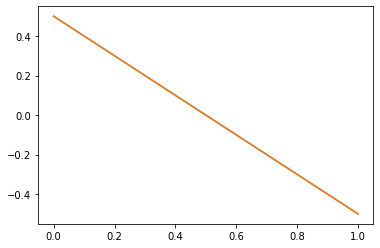

In [107]:
df = pandas.read_csv('build/data.csv')
X = df['x'].to_numpy()
U = df['u'].to_numpy()
dU = df['du'].to_numpy()

plt.plot(X,dU)
plt.plot(X,1/2-X)
#plt.plot(X,-X*(X-1)/2)

In [108]:
E = 1/2-X-dU

np.sqrt(np.sum( E**2 )*(X[1]-X[0]))

2.0357038463832088e-07

In [105]:
np.sqrt(1/4-1/2+1/3)

0.28867513459481287

In [106]:
E = -X*(X-1)/2-U

np.sqrt(np.sum( E**2 )*(X[1]-X[0]))

1.9729637963648255e-07

In [44]:
f1 = f.subs(d,a)

In [45]:
r = f1.subs(x,1);r

a + c - 1/2

In [46]:
f2 = f1.subs(c,b-r+c)

In [61]:
f2.subs(a,1.2).subs(b,1.6)

-x**2/2 + 0.9*x + 1.2

0.09

In [193]:
(x-a)/(b-a)

(-a + x)/(-a + b)

In [194]:
e = sym.Symbol('e')

In [196]:
(e+1)/2

e/2 + 1/2

In [7]:
x = np.linspace(0,1,100)
y = -x*(x-1)/2
dy = 1/2-x

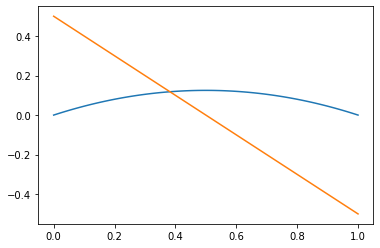

In [8]:
plt.plot(x,y)
plt.plot(x,dy)